In [16]:
import torch
import numpy as np
from torchaudio.transforms import MelScale,Spectrogram,GriffinLim,InverseMelScale
from pydub import AudioSegment
import matplotlib.pyplot as plt
import config
import torch.nn.functional as F

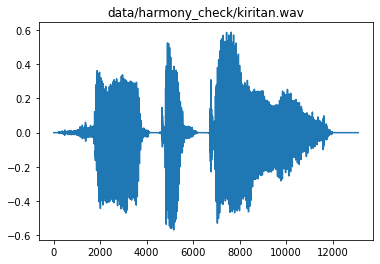

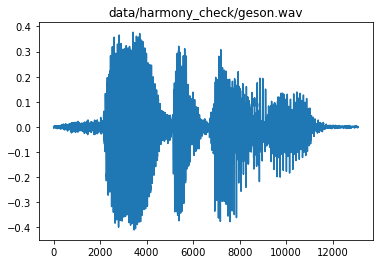

In [3]:
file1 = 'data/harmony_check/kiritan.wav'
file2 = 'data/harmony_check/geson.wav'
def readsound(file:str) -> np.ndarray:
    sound = AudioSegment.from_file(file)
    sound = sound.set_channels(config.channels)
    sound = sound.set_frame_rate(config.frame_rate)
    sound = sound.set_sample_width(config.sample_width)
    sound = np.array(sound.get_array_of_samples()) / config.sample_range
    return sound
sound1 = readsound(file1)
sound2 = readsound(file2)
plt.plot(sound1)
plt.title(file1)
plt.show()
plt.plot(sound2)
plt.title(file2)
plt.show()

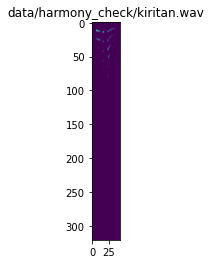

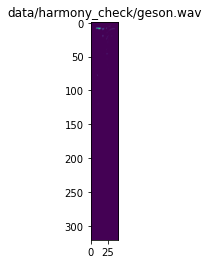

In [14]:
sound1_t,sound2_t = torch.from_numpy(sound1),torch.from_numpy(sound2)
to_spect = Spectrogram(config.recognize_length,hop_length=config.overlap_length)
sound1_t,sound2_t = to_spect(sound1_t).float(),to_spect(sound2_t).float()
plt.title(file1)
plt.imshow(sound1_t)
plt.show()
plt.title(file2)
plt.imshow(sound2_t)
plt.show()

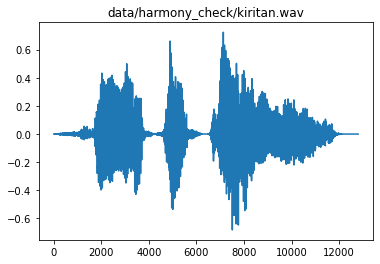

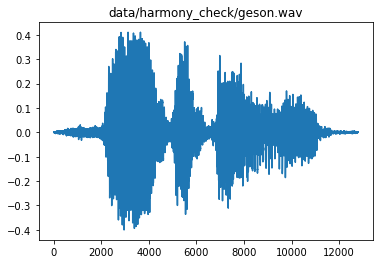

In [8]:
# Griffin Lim
griflim = GriffinLim(config.recognize_length,hop_length=config.overlap_length)
isound1_t,isound2_t = griflim(sound1_t),griflim(sound2_t)
plt.title(file1)
plt.plot(isound1_t)
plt.show()
plt.title(file2)
plt.plot(isound2_t)
plt.show()

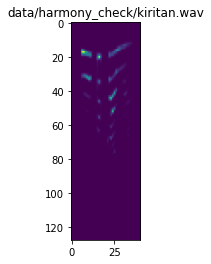

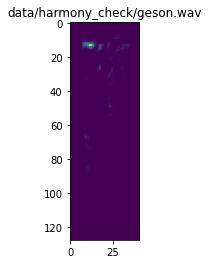

In [18]:
# mel scale
mel_scaler = MelScale(config.mel_channels,config.frame_rate,n_stft=config.fft_channels)
sound1_tm,sound2_tm = mel_scaler(sound1_t),mel_scaler(sound2_t)
plt.title(file1)
plt.imshow(sound1_tm)
plt.show()
plt.title(file2)
plt.imshow(sound2_tm)
plt.show()

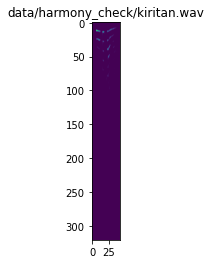

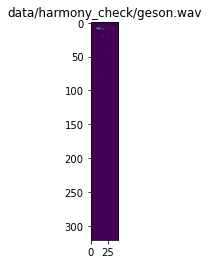

In [19]:
# inverse mel scale
imel_scaler = InverseMelScale(config.fft_channels,config.mel_channels,config.frame_rate).cuda()
isound1_tm,isound2_tm = imel_scaler(sound1_tm.cuda()).cpu(),imel_scaler(sound2_tm.cuda()).cpu()
plt.title(file1)
plt.imshow(isound1_tm)
plt.show()
plt.title(file2)
plt.imshow(isound2_tm)
plt.show()

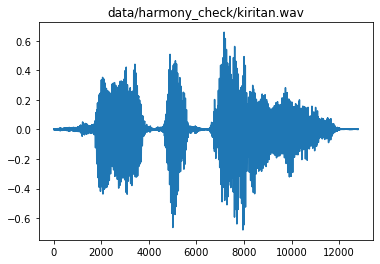

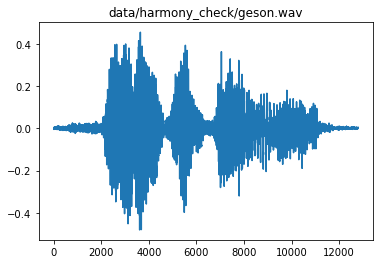

In [21]:
# Griffin Lim
griflim = GriffinLim(config.recognize_length,hop_length=config.overlap_length)
iisound1_t,iisound2_t = griflim(isound1_tm),griflim(isound2_tm)
plt.title(file1)
plt.plot(iisound1_t)
plt.show()
plt.title(file2)
plt.plot(iisound2_t)
plt.show()

In [23]:
import sounddevice as sd
sd.play(iisound1_t.numpy(),config.frame_rate)